# Random Forest Classification

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

## Importing the dataset

In [2]:
dataset = pd.read_csv('../Dataset/breast_cancer_wisconsin.csv')

In [3]:
print("Dataset Information");
print("__________________________")
pprint(dataset.info());
print("\n")
print("Number of null data:\n")
print("__________________________")
pprint(pd.isnull(dataset).sum())

Dataset Information
__________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


Number of null data:

__________________________
Clump_thickness                 0
Uniformity_

Proccess null value:

In [4]:
threshold = 0.05;

if dataset.isna().sum().sum() / dataset.size < threshold:
    dataset = dataset.dropna()
else:
    for col in dataset.columns:
        if dataset[col].dtype in ['float64', 'int64']:
            # Điền NaN bằng mean cho dữ liệu số
            dataset[col] = dataset[col].fillna(dataset[col].mean())
        else:
            # Điền NaN bằng giá trị phổ biến nhất cho dữ liệu dạng object/categorical
            dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

print("Number of null data:\n")
print("__________________________")
pprint(pd.isnull(dataset).sum())

Number of null data:

__________________________
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


## Declare features and dependant variables

On the features, remove the "Sample code number" because it is not relevant to the prediction

In [5]:
X = dataset.iloc[:,1:-1].values;
pprint(X)


array([[ 1.,  1.,  1., ...,  3.,  1.,  1.],
       [ 4.,  4.,  5., ...,  3.,  2.,  1.],
       [ 1.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [10., 10.,  3., ...,  8., 10.,  2.],
       [ 8.,  6.,  4., ..., 10.,  6.,  1.],
       [ 8.,  8.,  5., ..., 10.,  4.,  1.]])


In [6]:
y = dataset.iloc[:, -1].values;
pprint(y);

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

print("DataSet Splitting:\n");
print("_______________________________")
print("X_train: ", np.size(X_train));
print("X_test: ", np.size(X_test));
print("y_train:", np.size(y_train));
print("y_test", np.size(y_test));


DataSet Splitting:

_______________________________
X_train:  4368
X_test:  1096
y_train: 546
y_test 137


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Feature Scaling Applied Successfully!")
print("_____________________________________")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nTraining set - First 5 samples after scaling:")
pprint(X_train[:5])
print("\nTest set - First 5 samples after scaling:")
pprint(X_test[:5])

Feature Scaling Applied Successfully!
_____________________________________
X_train shape: (546, 8)
X_test shape: (137, 8)

Training set - First 5 samples after scaling:
array([[-0.69781134, -0.74152574, -0.63363747, -0.54871998,  1.81553572,
         0.61907387,  0.34532102, -0.33863738],
       [-0.69781134, -0.74152574, -0.63363747, -0.99789705, -0.68279599,
        -0.18860673, -0.62157783, -0.33863738],
       [-0.69781134, -0.74152574, -0.63363747, -0.54871998, -0.68279599,
        -0.18860673, -0.62157783, -0.33863738],
       [-0.69781134, -0.40497291, -0.63363747, -0.54871998, -0.68279599,
        -0.59244703, -0.62157783, -0.33863738],
       [-0.37244414, -0.06842008, -0.63363747,  1.24798832, -0.12761116,
         1.42675446, -0.62157783, -0.33863738]])

Test set - First 5 samples after scaling:
array([[-0.69781134, -0.74152574, -0.63363747, -0.54871998,  0.42757366,
        -0.99628733, -0.62157783, -0.33863738],
       [-0.69781134, -0.74152574, -0.63363747, -0.54871998, 

## Training the Random Forest model on the Training set

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)
pprint(y_pred)

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2], dtype=int64)


## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix;

cm = confusion_matrix(y_test, y_pred);
pprint(cm)

array([[84,  3],
       [ 1, 49]], dtype=int64)


## Visualizing the Training set results

C:\Users\Admin\AppData\Local\Temp\ipykernel_20348\2623494369.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


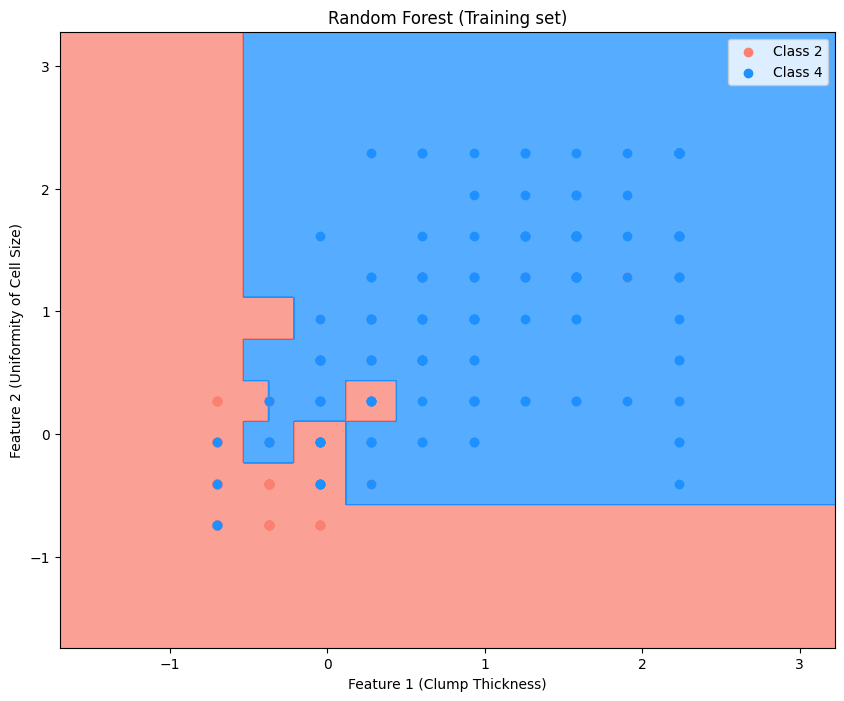

Visualization uses Random Forest with 10 estimators and entropy criterion (same as main classifier)


In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# We'll use only the first two features for visualization (since we can't visualize 9D)
X_set, y_set = X_train[:, [0, 1]], y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a temporary Random Forest classifier with only 2 features using same parameters as main classifier
classifier_2d = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_2d.fit(X_set, y_set)

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}')
plt.title('Random Forest (Training set)')
plt.xlabel('Feature 1 (Clump Thickness)')
plt.ylabel('Feature 2 (Uniformity of Cell Size)')
plt.legend()
plt.show()

print("Visualization uses Random Forest with 10 estimators and entropy criterion (same as main classifier)")

## Testing different Random Forest parameters to optimize performance

## Analyzing Random Forest Feature Importance

Random Forest Model Information:
Number of Trees: 10
Criterion: entropy
Training Accuracy: 0.9982
Test Accuracy: 0.9708

Feature Importance (Top 5):
1. Uniformity_of_cell_size  : 0.3876
2. Single_epithelial_cell_size: 0.1523
3. Bare_nuclei              : 0.1353
4. Uniformity_of_cell_shape : 0.0913
5. Bland_chromatin          : 0.0912


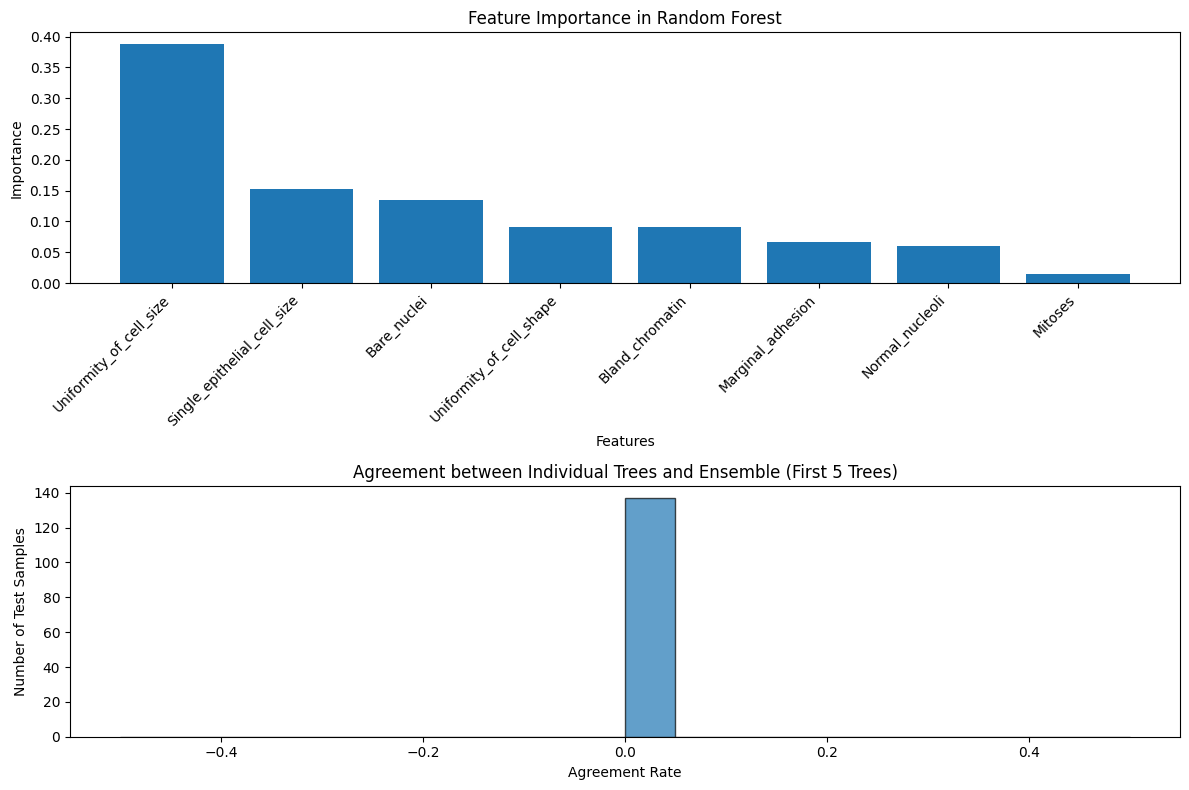


Out-of-Bag Score: Not available (set oob_score=True when creating classifier)

Ensemble Diversity Analysis:
Average Agreement Rate: 0.0000
Standard Deviation: 0.0000
- Higher agreement = More stable predictions
- Lower agreement = More diverse ensemble (can be good for complex data)

Individual Tree Performance (First 5 trees):
Tree 1: Accuracy=0.0000, Depth=10, Leaves=23
Tree 2: Accuracy=0.0000, Depth=9, Leaves=31
Tree 3: Accuracy=0.0000, Depth=10, Leaves=25
Tree 4: Accuracy=0.0000, Depth=12, Leaves=34
Tree 5: Accuracy=0.0000, Depth=9, Leaves=33

Ensemble Accuracy: 0.9708
Note: Ensemble usually performs better than individual trees!


In [14]:
import matplotlib.pyplot as plt

# Get feature names from the dataset
feature_names = dataset.columns[1:-1].tolist()  # Exclude first (sample code) and last (class) columns

# Feature importance analysis
feature_importance = classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Random Forest Model Information:")
print("=" * 35)
print(f"Number of Trees: {classifier.n_estimators}")
print(f"Criterion: {classifier.criterion}")
print(f"Training Accuracy: {classifier.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {classifier.score(X_test, y_test):.4f}")

print(f"\nFeature Importance (Top 5):")
print("=" * 35)
for i, (_, row) in enumerate(feature_importance_df.head().iterrows()):
    print(f"{i+1}. {row['Feature']:25}: {row['Importance']:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Compare individual tree predictions vs ensemble prediction
plt.subplot(2, 1, 2)
individual_predictions = []
for tree in classifier.estimators_[:5]:  # Take first 5 trees
    pred = tree.predict(X_test)
    individual_predictions.append(pred)

# Calculate agreement between trees
ensemble_pred = classifier.predict(X_test)
agreements = []
for i in range(len(X_test)):
    tree_preds = [pred[i] for pred in individual_predictions]
    agreement = sum(1 for pred in tree_preds if pred == ensemble_pred[i]) / len(tree_preds)
    agreements.append(agreement)

plt.hist(agreements, bins=20, alpha=0.7, edgecolor='black')
plt.title('Agreement between Individual Trees and Ensemble (First 5 Trees)')
plt.xlabel('Agreement Rate')
plt.ylabel('Number of Test Samples')
plt.tight_layout()
plt.show()

# Out-of-bag score if available
if hasattr(classifier, 'oob_score_') and classifier.oob_score:
    print(f"\nOut-of-Bag Score: {classifier.oob_score_:.4f}")
else:
    print(f"\nOut-of-Bag Score: Not available (set oob_score=True when creating classifier)")

# Ensemble diversity analysis
print(f"\nEnsemble Diversity Analysis:")
print("=" * 30)
print(f"Average Agreement Rate: {np.mean(agreements):.4f}")
print(f"Standard Deviation: {np.std(agreements):.4f}")
print("- Higher agreement = More stable predictions")
print("- Lower agreement = More diverse ensemble (can be good for complex data)")

# Individual tree performance
print(f"\nIndividual Tree Performance (First 5 trees):")
print("=" * 50)
for i, tree in enumerate(classifier.estimators_[:5]):
    tree_acc = tree.score(X_test, y_test)
    tree_depth = tree.get_depth()
    tree_leaves = tree.get_n_leaves()
    print(f"Tree {i+1}: Accuracy={tree_acc:.4f}, Depth={tree_depth}, Leaves={tree_leaves}")

ensemble_acc = classifier.score(X_test, y_test)
print(f"\nEnsemble Accuracy: {ensemble_acc:.4f}")
print("Note: Ensemble usually performs better than individual trees!")

C:\Users\Admin\AppData\Local\Temp\ipykernel_20348\2357273080.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[idx].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\Admin\AppData\Local\Temp\ipykernel_20348\2357273080.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[idx].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
C:\Users\Admin\AppData\Local\Temp\ipykernel_20348\2357273080.py:43: UserWarn

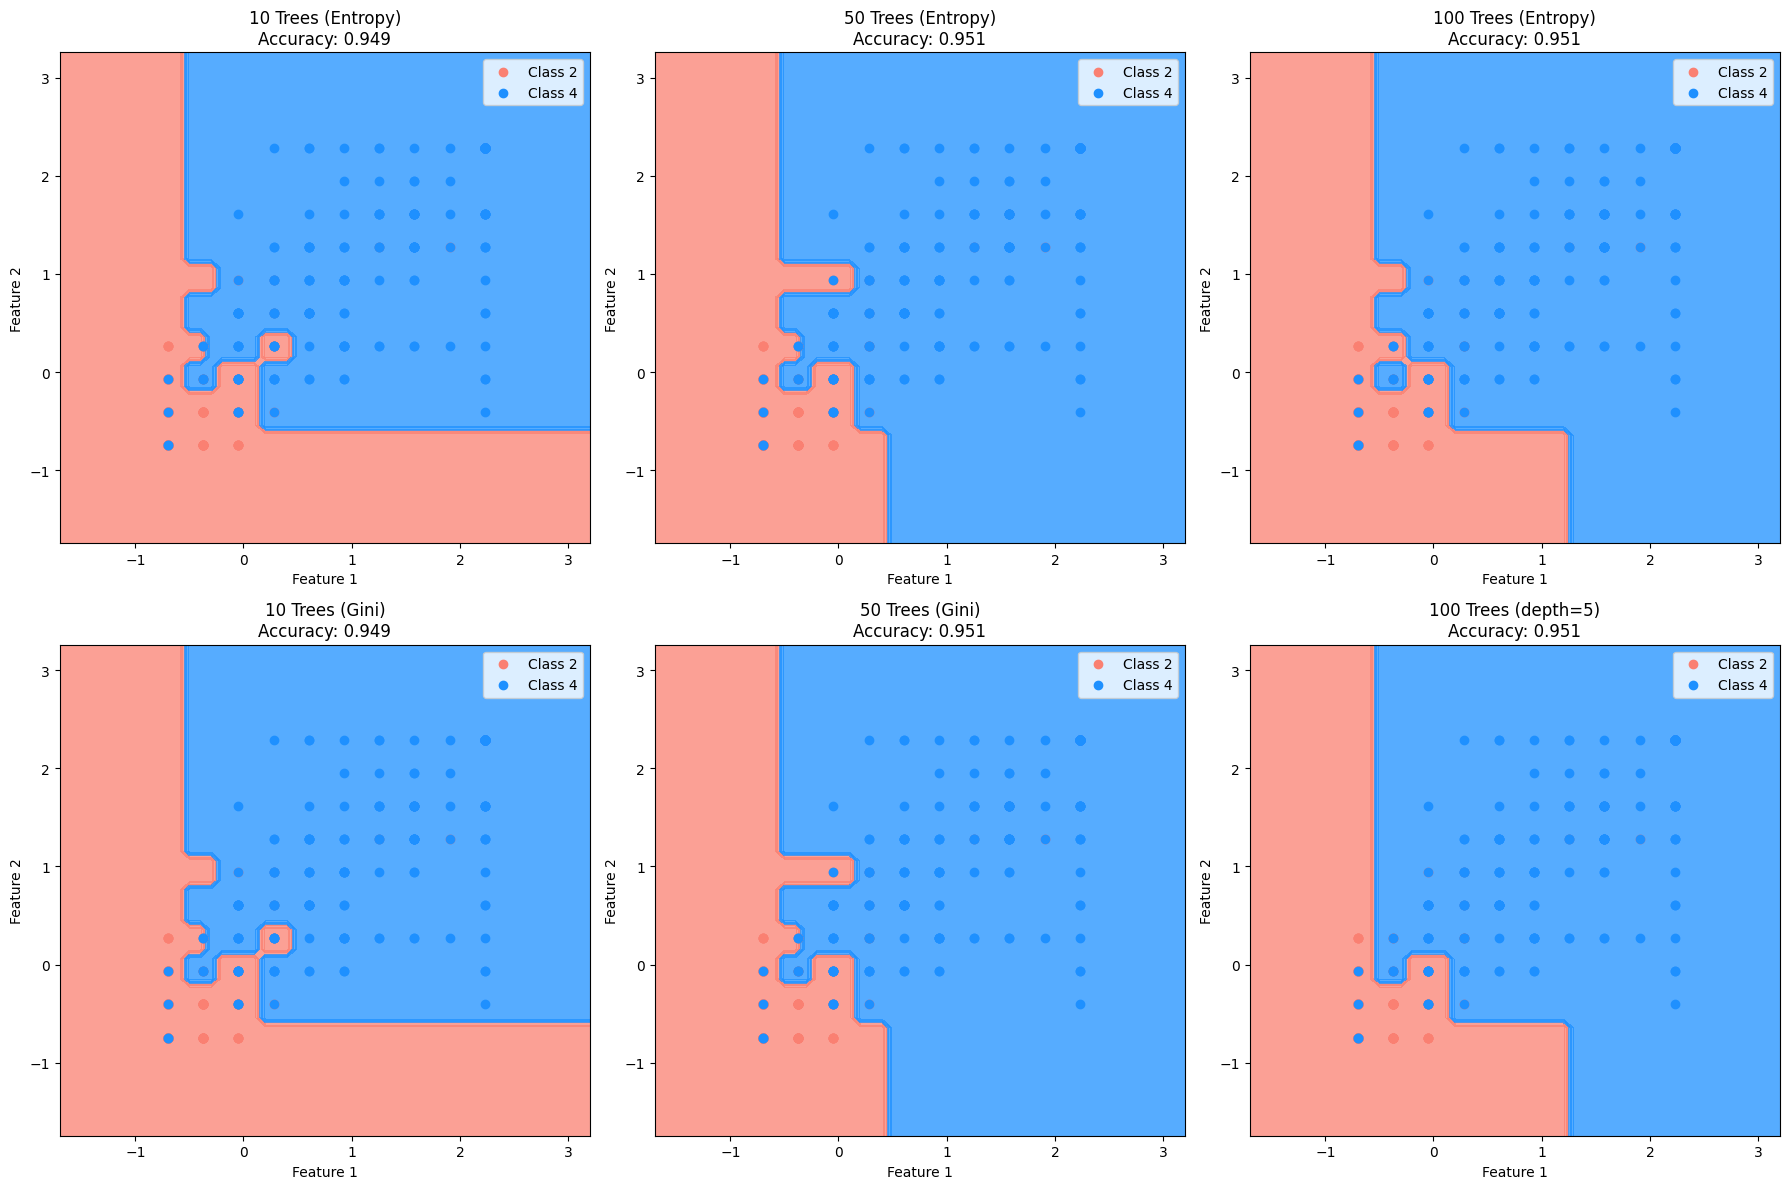

Random Forest Configuration Comparison Results (on 2D data):
10 Trees (Entropy)       : Accuracy = 0.9487
50 Trees (Entropy)       : Accuracy = 0.9505
100 Trees (Entropy)      : Accuracy = 0.9505
10 Trees (Gini)          : Accuracy = 0.9487
50 Trees (Gini)          : Accuracy = 0.9505
100 Trees (depth=5)      : Accuracy = 0.9505

Best Configuration: 50 Trees (Entropy) with accuracy 0.9505

Full 9D Data Comparison:
10 Trees (Entropy)       : Train=0.9982, Test=0.9708, Trees=10
50 Trees (Entropy)       : Train=1.0000, Test=0.9708, Trees=50
50 Trees (Entropy)       : Train=1.0000, Test=0.9708, Trees=50
100 Trees (Entropy)      : Train=1.0000, Test=0.9635, Trees=100
10 Trees (Gini)          : Train=0.9963, Test=0.9489, Trees=10
100 Trees (Entropy)      : Train=1.0000, Test=0.9635, Trees=100
10 Trees (Gini)          : Train=0.9963, Test=0.9489, Trees=10
50 Trees (Gini)          : Train=1.0000, Test=0.9562, Trees=50
50 Trees (Gini)          : Train=1.0000, Test=0.9562, Trees=50
100 Trees (de

In [15]:
rf_test = 1
if rf_test == 1:
    # Test different Random Forest configurations
    rf_configs = [
        {'n_estimators': 10, 'criterion': 'entropy', 'name': '10 Trees (Entropy)'},
        {'n_estimators': 50, 'criterion': 'entropy', 'name': '50 Trees (Entropy)'},
        {'n_estimators': 100, 'criterion': 'entropy', 'name': '100 Trees (Entropy)'},
        {'n_estimators': 10, 'criterion': 'gini', 'name': '10 Trees (Gini)'},
        {'n_estimators': 50, 'criterion': 'gini', 'name': '50 Trees (Gini)'},
        {'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy', 'name': '100 Trees (depth=5)'}
    ]
    
    X_set, y_set = X_train[:, [0, 1]], y_train
    
    # Store results for comparison
    results = []
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for idx, config in enumerate(rf_configs):
        # Create Random Forest classifier with different configuration
        rf_params = {k: v for k, v in config.items() if k not in ['name']}
        rf_params['random_state'] = 0
        
        classifier_rf = RandomForestClassifier(**rf_params)
        classifier_rf.fit(X_set, y_set)
        
        # Calculate accuracy on 2D data
        accuracy_2d = classifier_rf.score(X_set, y_set)
        results.append((config['name'], accuracy_2d))
        
        # Create mesh for visualization
        X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                            np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
        
        # Plot decision boundary
        axes[idx].contourf(X1, X2, classifier_rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                          alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
        
        # Plot data points
        for i, j in enumerate(np.unique(y_set)):
            axes[idx].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                            c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}')
        
        axes[idx].set_title(f'{config["name"]}\nAccuracy: {accuracy_2d:.3f}')
        axes[idx].set_xlabel('Feature 1')
        axes[idx].set_ylabel('Feature 2')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()
    
    # Print comparison results
    print("Random Forest Configuration Comparison Results (on 2D data):")
    print("=" * 65)
    for name, acc in results:
        print(f"{name:25}: Accuracy = {acc:.4f}")
    
    # Find best configuration
    best_config, best_acc = max(results, key=lambda x: x[1])
    print(f"\nBest Configuration: {best_config} with accuracy {best_acc:.4f}")
    
    # Now test on full 9D data for more comprehensive comparison
    print("\n" + "=" * 70)
    print("Full 9D Data Comparison:")
    print("=" * 70)
    
    full_results = []
    for config in rf_configs:
        rf_params = {k: v for k, v in config.items() if k not in ['name']}
        rf_params['random_state'] = 0
        
        classifier_full = RandomForestClassifier(**rf_params)
        classifier_full.fit(X_train, y_train)
        
        # Test on both training and test sets
        train_acc = classifier_full.score(X_train, y_train)
        test_acc = classifier_full.score(X_test, y_test)
        n_estimators = classifier_full.n_estimators
        
        full_results.append((config['name'], train_acc, test_acc, n_estimators))
        
        print(f"{config['name']:25}: Train={train_acc:.4f}, Test={test_acc:.4f}, Trees={n_estimators}")
    
    # Find best configuration based on test accuracy
    best_config_full, best_train, best_test, best_trees = max(full_results, key=lambda x: x[2])
    print(f"\nBest Configuration for 9D: {best_config_full}")
    print(f"Test Acc: {best_test:.4f}, Train Acc: {best_train:.4f}")
    print(f"Number of Trees: {best_trees}")
    
    # Analysis of overfitting and ensemble size
    print(f"\nOverfitting Analysis:")
    print("=" * 40)
    for name, train_acc, test_acc, n_trees in full_results:
        overfitting = train_acc - test_acc
        print(f"{name:25}: Overfitting={overfitting:.4f}, Trees={n_trees}")
    
    # Recommendations
    print(f"\nRecommendations:")
    print("=" * 20)
    print("- More trees generally = Better performance + Less overfitting")
    print("- Gini vs Entropy: Try both, performance may vary")
    print("- max_depth controls individual tree complexity")
    print("- Random Forest is naturally resistant to overfitting")
    
else:
    print("Random Forest comparison skipped. Set rf_test = 1 to run comparison.")

## Visualizing the Test set results

C:\Users\Admin\AppData\Local\Temp\ipykernel_20348\4241784325.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


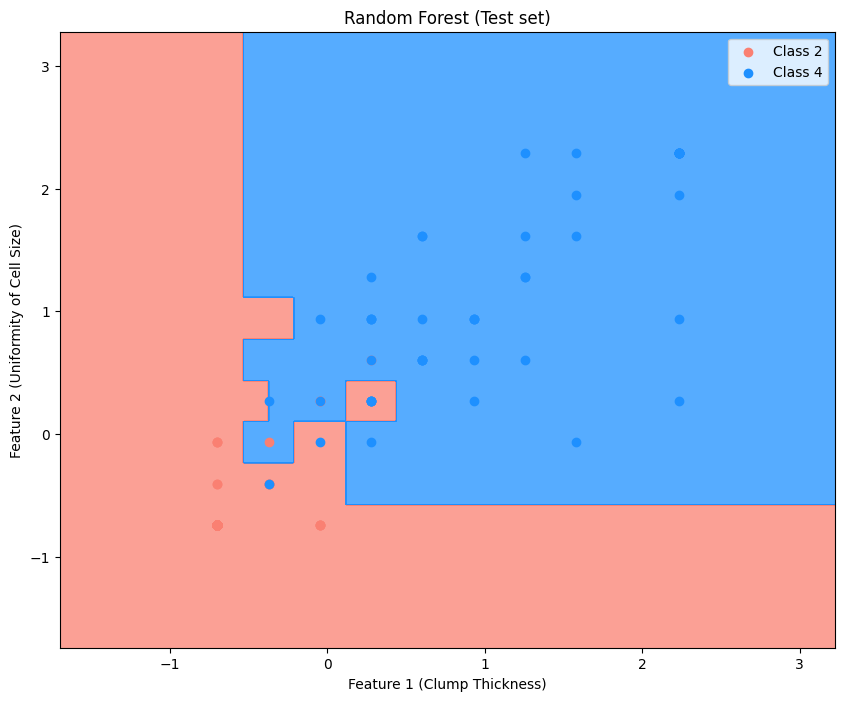

Test set visualization uses Random Forest with 10 estimators and entropy criterion (same as main classifier)


In [16]:
# Visualize Test set results using the same 2 features for Random Forest
X_set, y_set = X_test[:, [0, 1]], y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}')
plt.title('Random Forest (Test set)')
plt.xlabel('Feature 1 (Clump Thickness)')
plt.ylabel('Feature 2 (Uniformity of Cell Size)')
plt.legend()
plt.show()

print("Test set visualization uses Random Forest with 10 estimators and entropy criterion (same as main classifier)")

## Computing the accuracy with k-Fold Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracies:  ", format(accuracies.mean() * 100), " %")
print("Standard Deviation:  ", format(accuracies.std() * 100), " %")

Accuracies:   95.22558922558922  %
Standard Deviation:   2.9993480682429428  %
